In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize as n
from sklearn.linear_model import SGDRegressor
from scipy.io import loadmat

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def preprocessing_from_matlab_new(matlab_file_path: str, flat: bool = False) -> list[np.ndarray]:
    data: dict = loadmat(matlab_file_path)
    dict_keys = list(data.keys())
    last_key: str = dict_keys[-1]
    data_all_messed = data[last_key]

    organized_data: list = []
    for row in data_all_messed:
        organized_data.append(row[0].T)
    
    if flat:
        flattened_data = []
        for matrix in organized_data:
            flattened_data.append(matrix.flatten())
        return flattened_data
    else:
        return organized_data

def normalize_new(data: list[np.ndarray]) -> list[np.ndarray]:
    data_normalized: list = []
    data_norms: list = []
    for row in data:
        var_normalized, var_norm = n(X=row, norm="l2", return_norm=True, axis=0)
        data_normalized.append(var_normalized)
        data_norms.append(var_norm)
    return data_normalized, data_norms


In [4]:
IDX = random.randrange(10,900)
print(IDX)

95


In [5]:
xs_matlab = preprocessing_from_matlab_new("/home/gabriel/Documents/matlab_files/xs_all.mat")
tau_matlab = preprocessing_from_matlab_new("/home/gabriel/Documents/matlab_files/tau_all.mat")

In [7]:
pd.DataFrame(xs_matlab[0]).tail()

,0,1,2,3,4,5,6,7,8,9,10,11
19996,-0.246068,0.127513,1.243422e-09,0.003246,0.006272,-0.000001,0.254733,0.487787,3.0,0.012391,-0.006443,0.000002
19997,-0.246195,0.127270,1.221395e-09,0.003240,0.006275,-0.000001,0.254241,0.488042,3.0,0.012397,-0.006430,0.000002
19998,-0.246321,0.127026,1.199362e-09,0.003234,0.006279,-0.000001,0.253748,0.488296,3.0,0.012404,-0.006418,0.000002
19999,-0.246447,0.126783,1.177325e-09,0.003228,0.006282,-0.000001,0.253255,0.488550,3.0,0.012410,-0.006405,0.000002
20000,-0.246572,0.126539,1.155283e-09,0.003222,0.006285,-0.000001,0.252762,0.488803,3.0,0.012417,-0.006393,0.000002


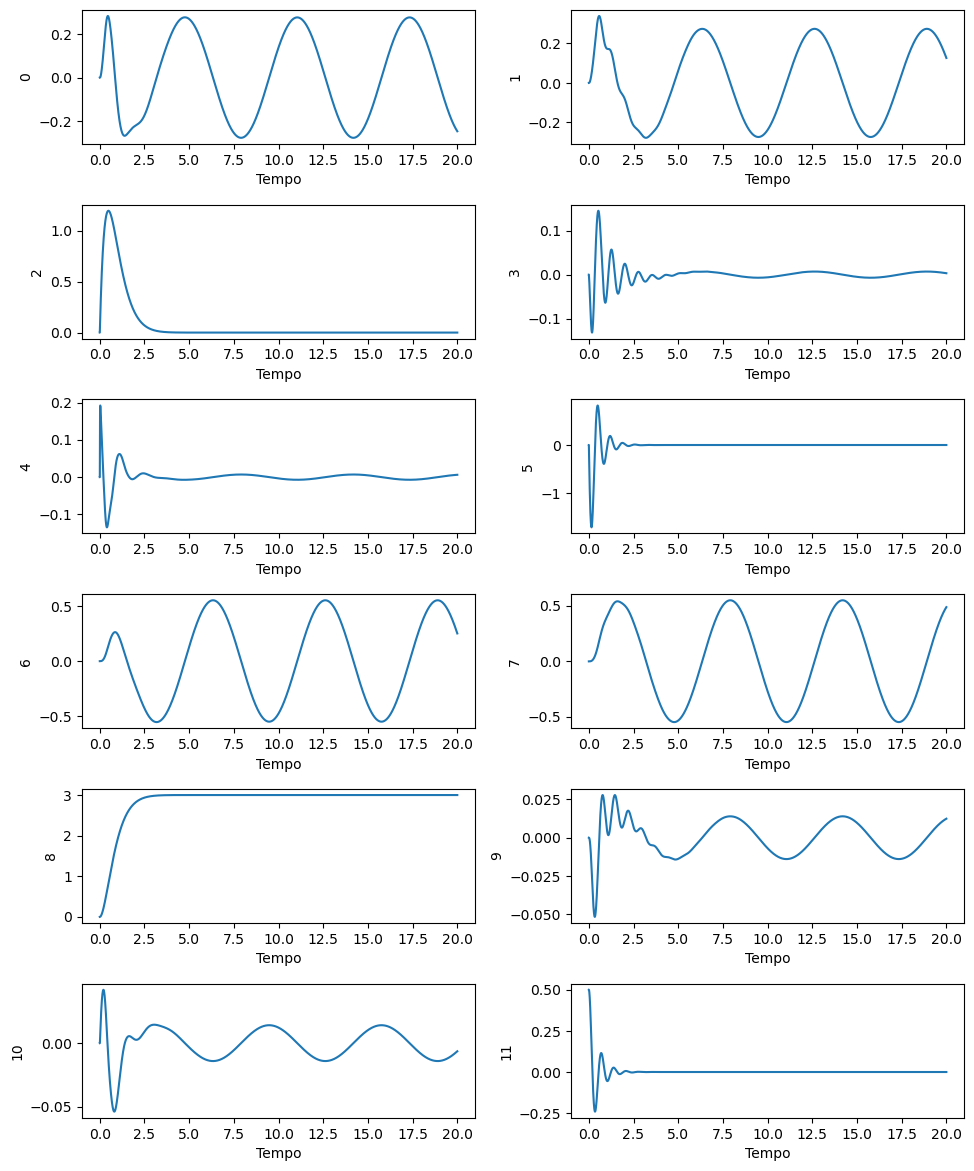

In [13]:
CM = 1/2.54
fig, axs = plt.subplots(6,2, figsize=(25*CM, 30*CM))

t = np.linspace(0,20,len(xs_matlab[0]))
for i, ax in enumerate(axs.flatten()):
    ax.plot(t, xs_matlab[0][:, i])
    ax.set_xlabel("Tempo")
    ax.set_ylabel(f"{i}")
fig.tight_layout()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(xs_matlab[IDX], tau_matlab[IDX], test_size=0.2)

# clf = RandomForestRegressor()
# clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

# y_pred = clf.predict(xs_matlab[IDX])
# t = np.linspace(1,20,len(y_pred))

# plt.style.use("seaborn-v0_8-darkgrid")
# fig, axs = plt.subplots(2,2, figsize=(10,7))

# for idx, ax in enumerate(axs.flatten()):
#     ax.plot(t, y_pred[:, idx], label="Pred")
#     ax.plot(t, tau_matlab[IDX][:, idx], label="Real")
#     ax.set_xlabel("Tempo")
#     ax.set_ylabel(f"$U_{idx+1}$")
#     ax.legend()
# fig.tight_layout()
